# Augmented Data Comparison

In this notebook, different ways to compare the quality of augmented time series are explored.

## 0 Imports and static variables

In [1]:
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# own classes
from scripts.data_helper import DataHelper
from scripts.augmentation import Aumgentation

In [2]:
DATA_FOLDER = Path("./data")
MULTIVARIATE_DATA_FOLDER = DATA_FOLDER / "multivariate"
UNIVARIATE_DATA_FOLDER = DATA_FOLDER / "univariate"

## 1 Loading data

In [3]:
aapl_ohlcav = DataHelper.load_time_series(UNIVARIATE_DATA_FOLDER / "AAPL_open_high_low_close_adjClose_volume.csv")
aapl_c = DataHelper.load_time_series(UNIVARIATE_DATA_FOLDER / "AAPL_close.csv")
aapl_c.head()

,Date,Close
0,2010-01-04,7.643214
1,2010-01-05,7.656429
2,2010-01-06,7.534643
3,2010-01-07,7.520714
4,2010-01-08,7.570714


## 2 Plot Data

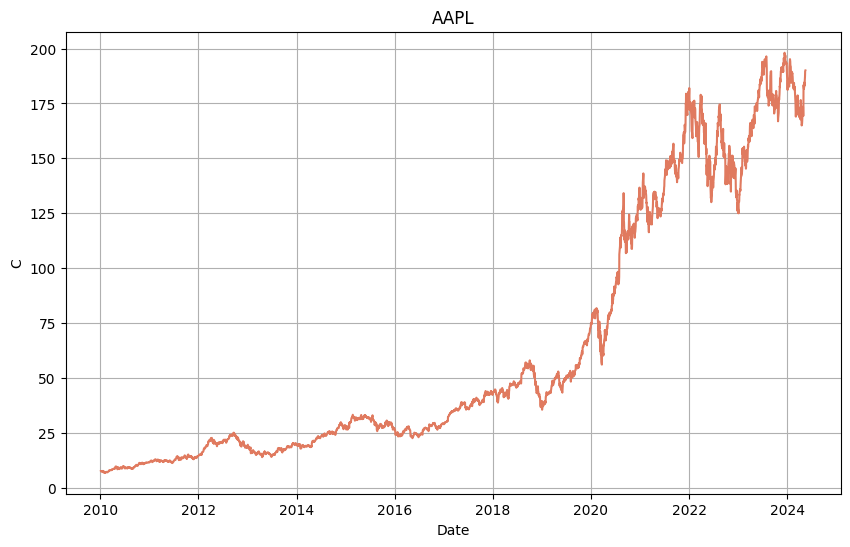

In [4]:
DataHelper.plot_time_series_attribute(df=aapl_ohlcav, title="AAPL")

In [5]:
# get only data between 2020-2024
aapl_ohlcav_20_24 = DataHelper.slice_years(df=aapl_ohlcav, years=["2020", "2024"])

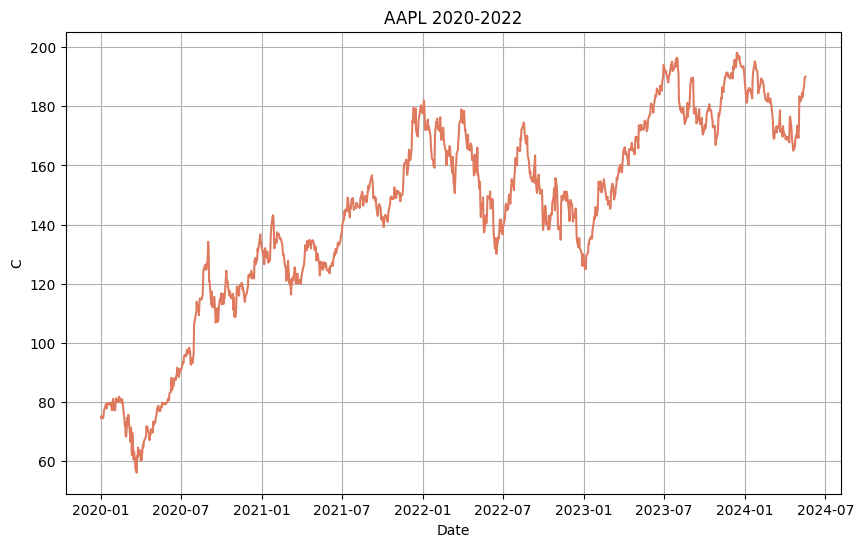

In [6]:
DataHelper.plot_time_series_attribute(aapl_ohlcav_20_24, "AAPL 2020-2022")

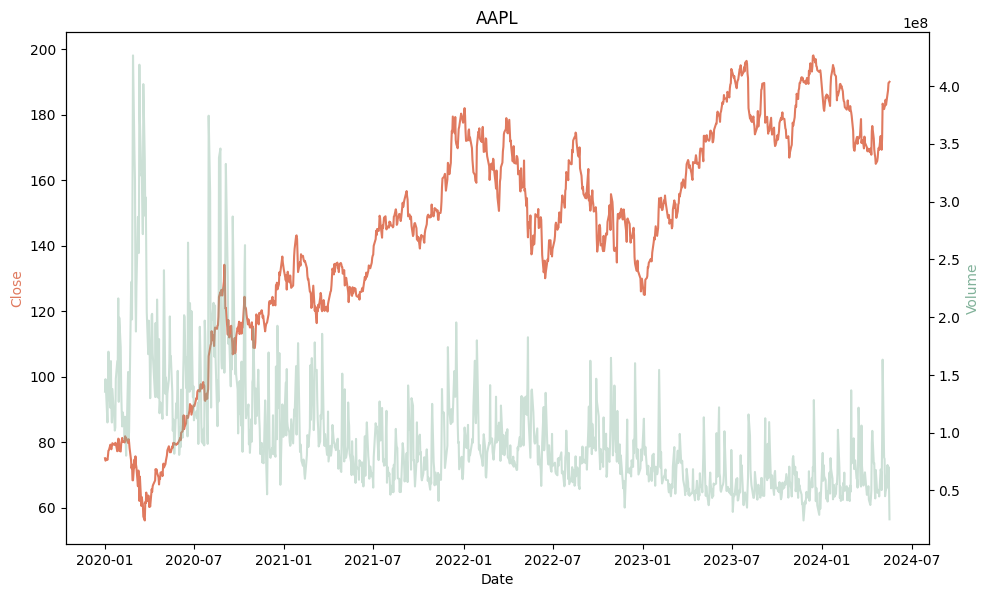

In [7]:
DataHelper.plot_multiple_time_series_attributes(aapl_ohlcav_20_24, "AAPL")

## 3 Brownian Motion

In [8]:
# random number generator
rng = np.random.default_rng(42)

paths = 50
points = 1000

# also kwown as drift, volatility
mean, standard_deviation = 0.0, 1.0

In [9]:
# create matrix from random numbers drawn from normalverteilung with specified mean and standard deviation
Z = rng.normal(mean, standard_deviation, (paths, points))
Z.shape

(50, 1000)

In [10]:
# create step size
interval = [0.0, 1.0]
dt = (interval[1] - interval[0]) / (points - 1)
dt

0.001001001001001001

In [11]:
# create array of evenly spaced numbers from withing the interval (including start and end)
t_axis = np.linspace(interval[0], interval[1], points)
t_axis

array([0.        , 0.001001  , 0.002002  , 0.003003  , 0.004004  ,
       0.00500501, 0.00600601, 0.00700701, 0.00800801, 0.00900901,
       0.01001001, 0.01101101, 0.01201201, 0.01301301, 0.01401401,
       0.01501502, 0.01601602, 0.01701702, 0.01801802, 0.01901902,
       0.02002002, 0.02102102, 0.02202202, 0.02302302, 0.02402402,
       0.02502503, 0.02602603, 0.02702703, 0.02802803, 0.02902903,
       0.03003003, 0.03103103, 0.03203203, 0.03303303, 0.03403403,
       0.03503504, 0.03603604, 0.03703704, 0.03803804, 0.03903904,
       0.04004004, 0.04104104, 0.04204204, 0.04304304, 0.04404404,
       0.04504505, 0.04604605, 0.04704705, 0.04804805, 0.04904905,
       0.05005005, 0.05105105, 0.05205205, 0.05305305, 0.05405405,
       0.05505506, 0.05605606, 0.05705706, 0.05805806, 0.05905906,
       0.06006006, 0.06106106, 0.06206206, 0.06306306, 0.06406406,
       0.06506507, 0.06606607, 0.06706707, 0.06806807, 0.06906907,
       0.07007007, 0.07107107, 0.07207207, 0.07307307, 0.07407

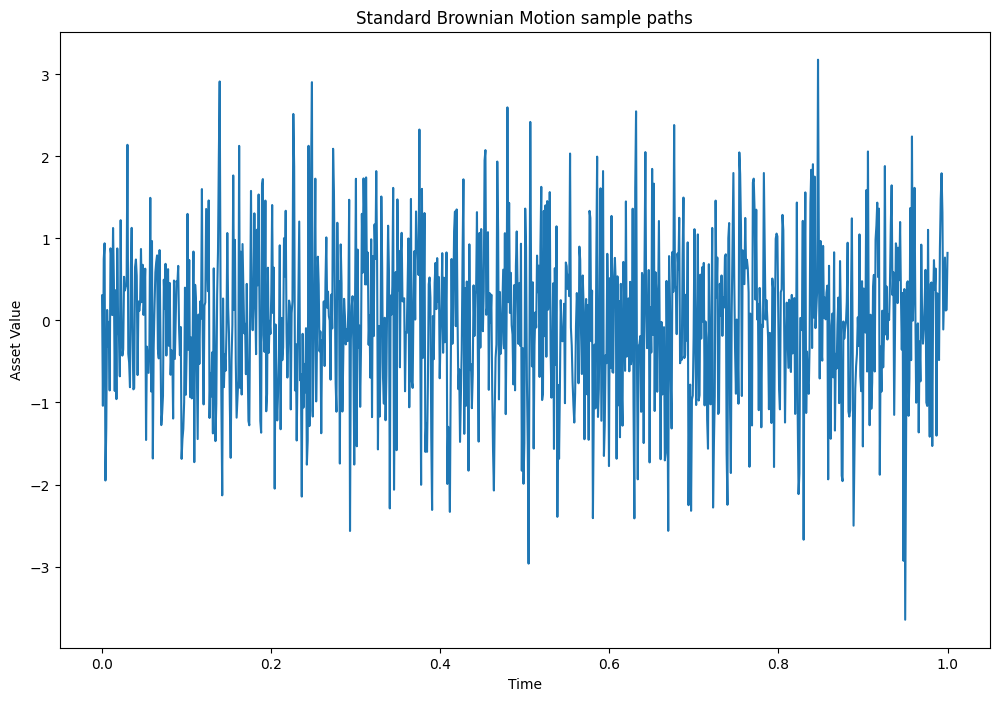

In [12]:
fig, ax = plt.subplots(1, 1, figsize=(12, 8))
for path in range(1):
    ax.plot(t_axis, Z[path, :])
ax.set_title('Standard Brownian Motion sample paths')
ax.set_xlabel('Time')
ax.set_ylabel('Asset Value')
plt.show()

In [13]:
# create brownian motion from Z and matrix filled with zeros
W = np.zeros((paths, points))
for idx in range(points-1):
    # get real index, because we need real_idx - 1 later on 
    real_idx = idx + 1
    # calculate value for current index for every path of the matrix
    W[:, real_idx] = W[:, real_idx - 1] + np.sqrt(dt) * Z[:, idx]
W

array([[ 0.00000000e+00,  9.64082176e-03, -2.32628192e-02, ...,
        -9.48121713e-01, -9.44287813e-01, -9.40150617e-01],
       [ 0.00000000e+00, -1.87561992e-03, -2.49492375e-02, ...,
        -2.62505923e+00, -2.62795543e+00, -2.64474989e+00],
       [ 0.00000000e+00, -1.42990962e-02, -3.53665347e-02, ...,
         9.77153515e-01,  1.05090387e+00,  1.07683005e+00],
       ...,
       [ 0.00000000e+00,  1.71708543e-02, -3.35738457e-03, ...,
        -6.60675491e-01, -6.15101474e-01, -6.43888488e-01],
       [ 0.00000000e+00, -6.58261911e-03, -3.22360613e-03, ...,
        -1.12041733e+00, -1.13760861e+00, -1.17463384e+00],
       [ 0.00000000e+00, -1.75807147e-02,  3.27239827e-02, ...,
        -1.60918991e+00, -1.59658219e+00, -1.55360838e+00]])

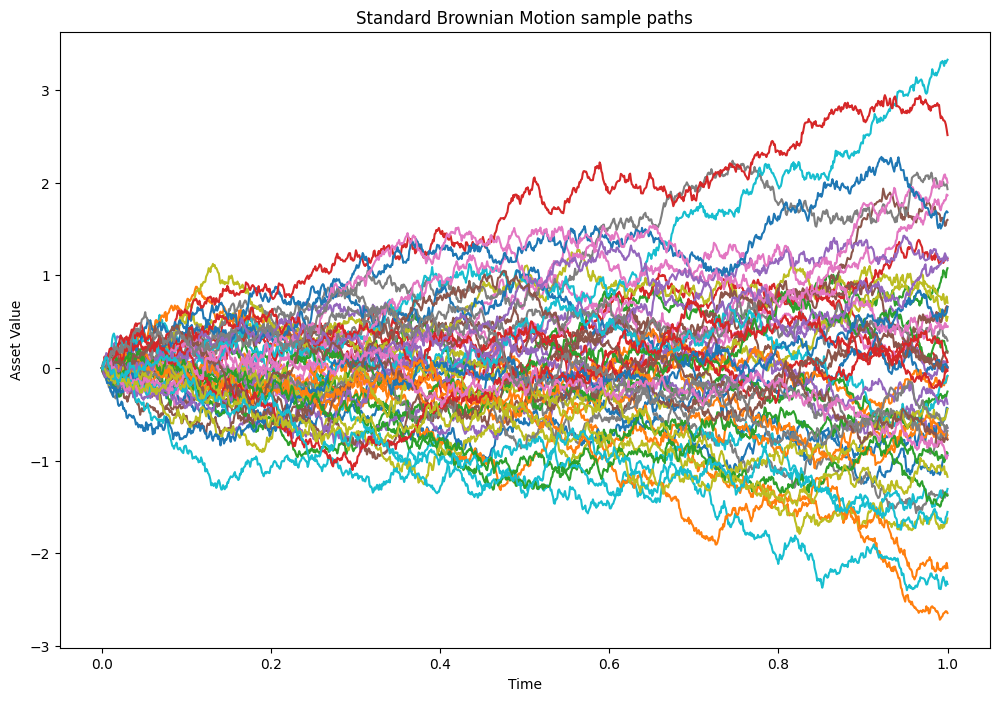

In [14]:
fig, ax = plt.subplots(1, 1, figsize=(12, 8))
for path in range(paths):
    ax.plot(t_axis, W[path, :])
ax.set_title('Standard Brownian Motion sample paths')
ax.set_xlabel('Time')
ax.set_ylabel('Asset Value')
plt.show()

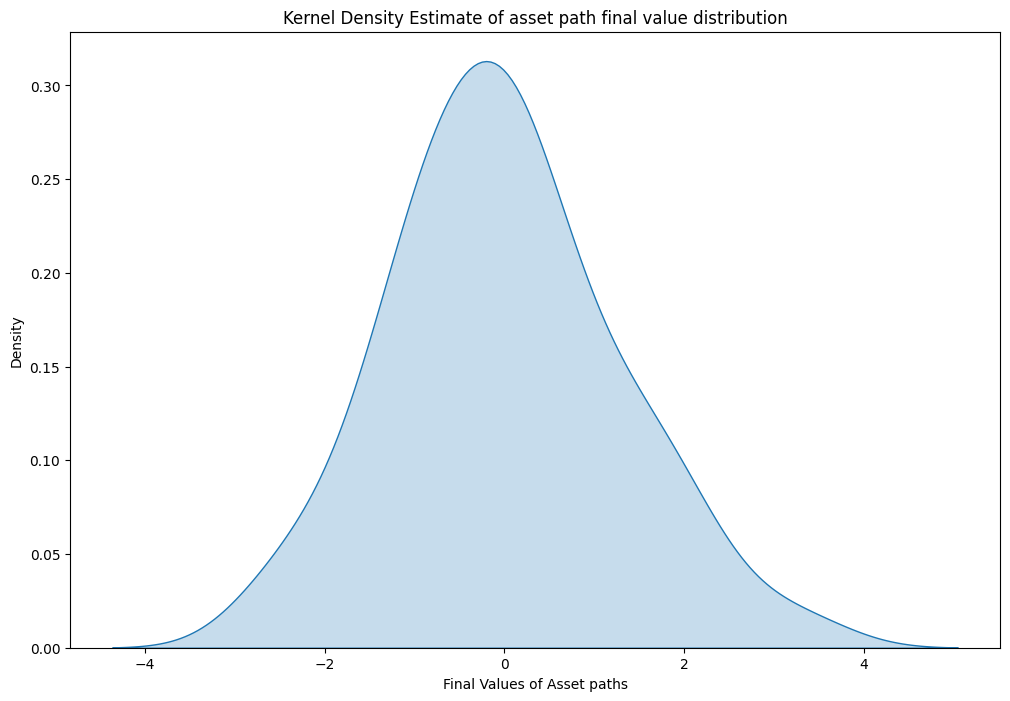

In [15]:
# Kernel Density Estimate (KDE) for estimating distribution of the final path values
final_values = pd.DataFrame({'final_values': W[:, -1]})

# plot 
fig, ax = plt.subplots(1, 1, figsize=(12, 8))
sns.kdeplot(data=final_values, x='final_values', fill=True, ax=ax)
ax.set_title('Kernel Density Estimate of asset path final value distribution')
ax.set_xlabel('Final Values of Asset paths')
plt.show()

In [16]:
# mean of final values
final_values.mean()

final_values   -0.011699
dtype: float64

In [17]:
# standard deviation of final values
final_values.std()

final_values    1.251382
dtype: float64

In [18]:
W[0, :].mean()

-0.4565649076325596

In [19]:
aapl_c.head()

,Date,Close
0,2010-01-04,7.643214
1,2010-01-05,7.656429
2,2010-01-06,7.534643
3,2010-01-07,7.520714
4,2010-01-08,7.570714


In [20]:
aapl_c.shift(1).head()

,Date,Close
0,NaT,NaN
1,2010-01-04,7.643214
2,2010-01-05,7.656429
3,2010-01-06,7.534643
4,2010-01-07,7.520714


In [96]:
def brownian_motion(df: pd.DataFrame) -> pd.DataFrame:
    '''Creates a new time series by applying brownian motion with mean and standard deviation from an existing time series'''
    df = df.copy()
    days = df.shape[0]

    # calculate daily log returns and put them in an array
    # df['LogReturns'] = np.log(df['Close'] / df['Close'].shift(1))
    # log_returns = df['LogReturns'].dropna()

    # calculate daily gains / losses and use them to calculate mean
    df['Diff'] = df['Close'].diff()
    diff = df['Diff'].dropna()

    # calculate mean and standard deviation from log returns 
    # mean, standard_deviation = log_returns.mean(), log_returns.std()
    mean, standard_deviation = diff.mean(), diff.std()

    # get normal distributed values which represent the daily gain / loss of the augmented time series
    random_values = rng.normal(mean, standard_deviation, days)

    # step size (1 day)
    step = 1

    # create mock array for augmented prices and set first value to first closing price of the time series
    augmented_prices = np.zeros(days)
    augmented_prices[0] = df.loc[0, 'Close']
    
    # create brownian motion
    for idx in range(days-1):
        # get real index, because we need real_idx - 1 later on 
        real_idx = idx + 1
        # calculate value for current index for every path of the matrix
        augmented_prices[real_idx] = augmented_prices[real_idx - 1] + mean * step + standard_deviation * np.sqrt(step) * random_values[idx]


    # apply augmented prices and drop LogReturns
    df['Close'] = augmented_prices
    df = df.drop(columns=['Diff'])   

    return df

In [97]:
asdf = brownian_motion(aapl_c)

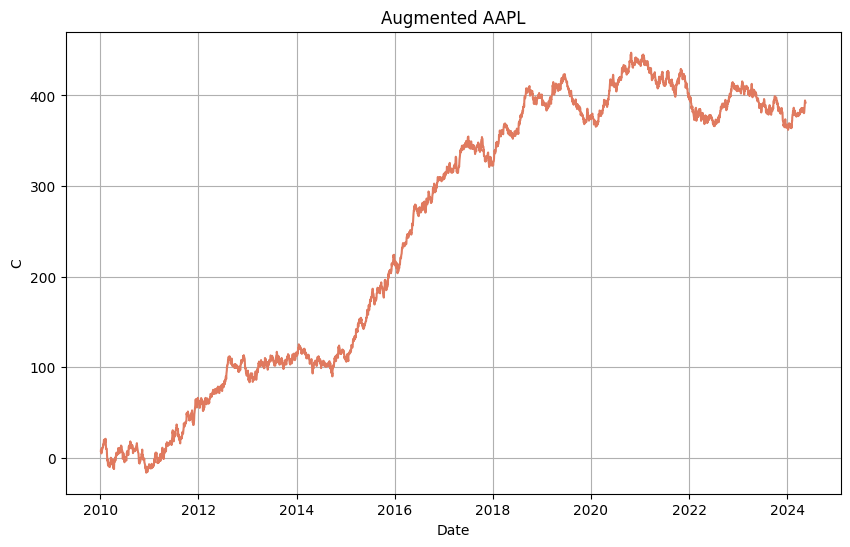

,Date,Close
0,2010-01-04,7.643214
1,2010-01-05,9.465590
2,2010-01-06,6.427215
3,2010-01-07,5.894672
4,2010-01-08,4.952558


In [98]:
DataHelper.plot_time_series_attribute(asdf, title="Augmented AAPL")
asdf.head()

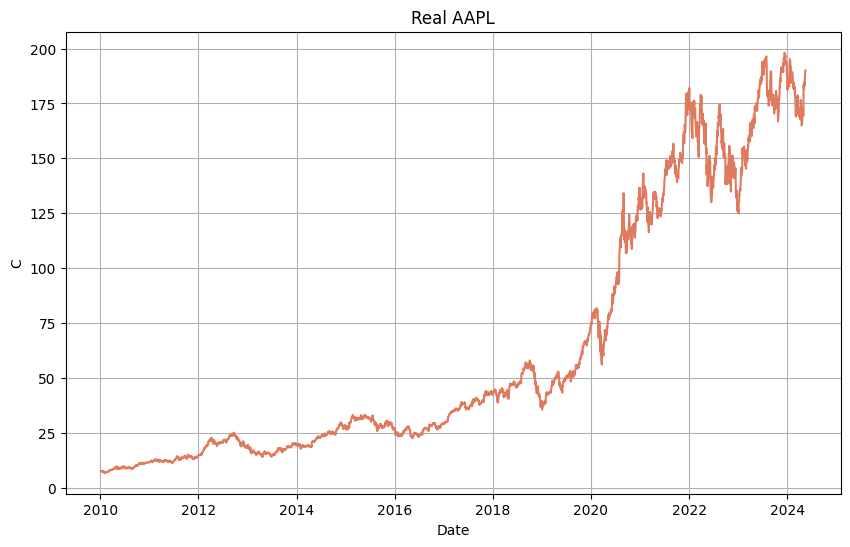

In [89]:
DataHelper.plot_time_series_attribute(aapl_c, title="Real AAPL")